# Ant_proxy_DC2008-2010

In [1]:
import os
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
from scipy import stats
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import cartopy.crs as ccrs

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
def Mon():
    import pandas as pd
    mons = pd.DataFrame({
            "name": ["Jan", "Feb", "Mar","Apr","May","Jun",\
                     "Jul","Aug","Sep","Oct","Nov","Dec","Jan"], 
            "days": [31,28,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc":[0,31,59,90,120,151,181,212,243,273,304,334,365], 
            "days_lp": [31,29,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc_lp":[0,31,60,91,121,152,182,213,244,274,305,335,366]             
            })
    return mons

In [4]:
mons=Mon()
xticks=np.zeros(12)
xticks[:]=mons["dayacc"][:-1]
xlabels=mons["name"][:-1]

In [5]:
class Site:
    def DomeF(self):
        sx=14 ; sy=60 # 77°18′59″S 39°42′04″E
        df_lat=-77.3
        df_lon=39.66
        return df_lon,df_lat,sx,sy
    def DomeC(self):
        sx=45 ; sy=59
        dc_lat=-73.95
        dc_lon=123.75
        return dc_lon,dc_lat,sx,sy    

In [6]:
dc_lon,dc_lat,dc_x,dc_y = Site().DomeC()

In [7]:
loadfile = "T2.npz"
dataset  = np.load(loadfile)
T2       = dataset["T2"]
lon2     = dataset["lon2"]
lat2     = dataset["lat2"]
y        = dataset["y"]
m        = dataset["m"]
d        = dataset["d"]

In [8]:
loadfile = "prcp.npz"
dataset  = np.load(loadfile)
prcp     = dataset["prcp"]

In [9]:
loadfile  = "prcp_d18O.npz"
dataset   = np.load(loadfile)
prcp_d18O = dataset["prcp_d18O"]

In [10]:
numofdays=366+365+365
model_dayst = len(y[y<2008])

model_dayed = model_dayst + numofdays

model_y              = y          [               model_dayst:model_dayed]
model_m              = m          [               model_dayst:model_dayed]
model_d              = d          [               model_dayst:model_dayed]
model_temp_df        = T2         [dc_x-1, dc_y-1,model_dayst:model_dayed]
model_prcp_df        = prcp       [dc_x-1, dc_y-1,model_dayst:model_dayed]
model_prcp_d18O_df   = prcp_d18O  [dc_x-1, dc_y-1,model_dayst:model_dayed]

In [11]:
obs_DomeC = np.genfromtxt("obs_DomeC.csv",
                           delimiter=",", # 区切り文字
                           usecols=(0,1,2,3,4,5,6,7,8,9,10) # 読み込みたい列
                          )

obs_len          = np.shape(obs_DomeC)[0]
obs_y_df         = obs_DomeC[1:,0]
obs_m_df         = obs_DomeC[1:,1]
obs_d_df         = obs_DomeC[1:,2]
obs_temp_df      = obs_DomeC[1:,3]
obs_prcp_df      = obs_DomeC[1:,4]
obs_prcp_d18O_df = obs_DomeC[1:,5]
obs_prcp_dD_df = obs_DomeC[1:,6]
obs_prcp_dex_df = obs_DomeC[1:,7]
obs_snowfall_df = obs_DomeC[1:,8]
obs_frost_df = obs_DomeC[1:,9]
obs_diamond_df = obs_DomeC[1:,10]

In [12]:
obs_snowfall_df[~np.isnan(obs_snowfall_df)] = -1
obs_frost_df[~np.isnan(obs_frost_df)] = -1
obs_diamond_df[~np.isnan(obs_diamond_df)] = -1

In [13]:
model_temp_dc2008=model_temp_df[model_y==2008]
model_prcp_dc2008=model_prcp_df[model_y==2008]
model_prcp_d18O_dc2008=model_prcp_d18O_df[model_y==2008]
obs_temp_dc2008=obs_temp_df[obs_y_df==2008]
obs_prcp_dc2008=obs_prcp_df[obs_y_df==2008]
obs_prcp_d18O_dc2008=obs_prcp_d18O_df[obs_y_df==2008]
obs_snowfall_dc2008=obs_snowfall_df[obs_y_df==2008]
obs_frost_dc2008=obs_frost_df[obs_y_df==2008]
obs_diamond_dc2008=obs_diamond_df[obs_y_df==2008]

In [14]:
model_temp_dc2009=model_temp_df[model_y==2009]
model_prcp_dc2009=model_prcp_df[model_y==2009]
model_prcp_d18O_dc2009=model_prcp_d18O_df[model_y==2009]
obs_temp_dc2009=obs_temp_df[obs_y_df==2009]
obs_prcp_dc2009=obs_prcp_df[obs_y_df==2009]
obs_prcp_d18O_dc2009=obs_prcp_d18O_df[obs_y_df==2009]
obs_prcp_dD_dc2009=obs_prcp_dD_df[obs_y_df==2009]
obs_prcp_dex_dc2009=obs_prcp_dex_df[obs_y_df==2009]
obs_snowfall_dc2009=obs_snowfall_df[obs_y_df==2009]
obs_frost_dc2009=obs_frost_df[obs_y_df==2009]
obs_diamond_dc2009=obs_diamond_df[obs_y_df==2009]

In [15]:
model_temp_dc2010=model_temp_df[model_y==2010]
model_prcp_dc2010=model_prcp_df[model_y==2010]
model_prcp_d18O_dc2010=model_prcp_d18O_df[model_y==2010]

obs_temp_dc2010=obs_temp_df[obs_y_df==2010]
obs_prcp_dc2010=obs_prcp_df[obs_y_df==2010]
obs_prcp_d18O_dc2010=obs_prcp_d18O_df[obs_y_df==2010]
obs_prcp_dD_dc2010=obs_prcp_dD_df[obs_y_df==2010]
obs_prcp_dex_dc2010=obs_prcp_dex_df[obs_y_df==2010]
obs_snowfall_dc2010=obs_snowfall_df[obs_y_df==2010]
obs_frost_dc2010=obs_frost_df[obs_y_df==2010]
obs_diamond_dc2010=obs_diamond_df[obs_y_df==2010]

In [16]:
def vert_lines(ax, xint):
    if len(xint) < 2 :
        ax.axvline(x=xint,ls='-',linewidth=1, color='k')
    else:
        for i in range(len(xint)):
            ax.axvline(x=xint[i],ls='--',linewidth=1, color='k')
        
    return ax

In [17]:
def hor_lines(ax, yint):
    if len(yint) < 2 :
        ax.axhline(y=yint,ls='-',linewidth=1, color='k')
    else:
        for i in range(len(yint)):
            ax.axhline(y=yint[i],ls='--',linewidth=1, color='k')  
            
    return ax

## scaling

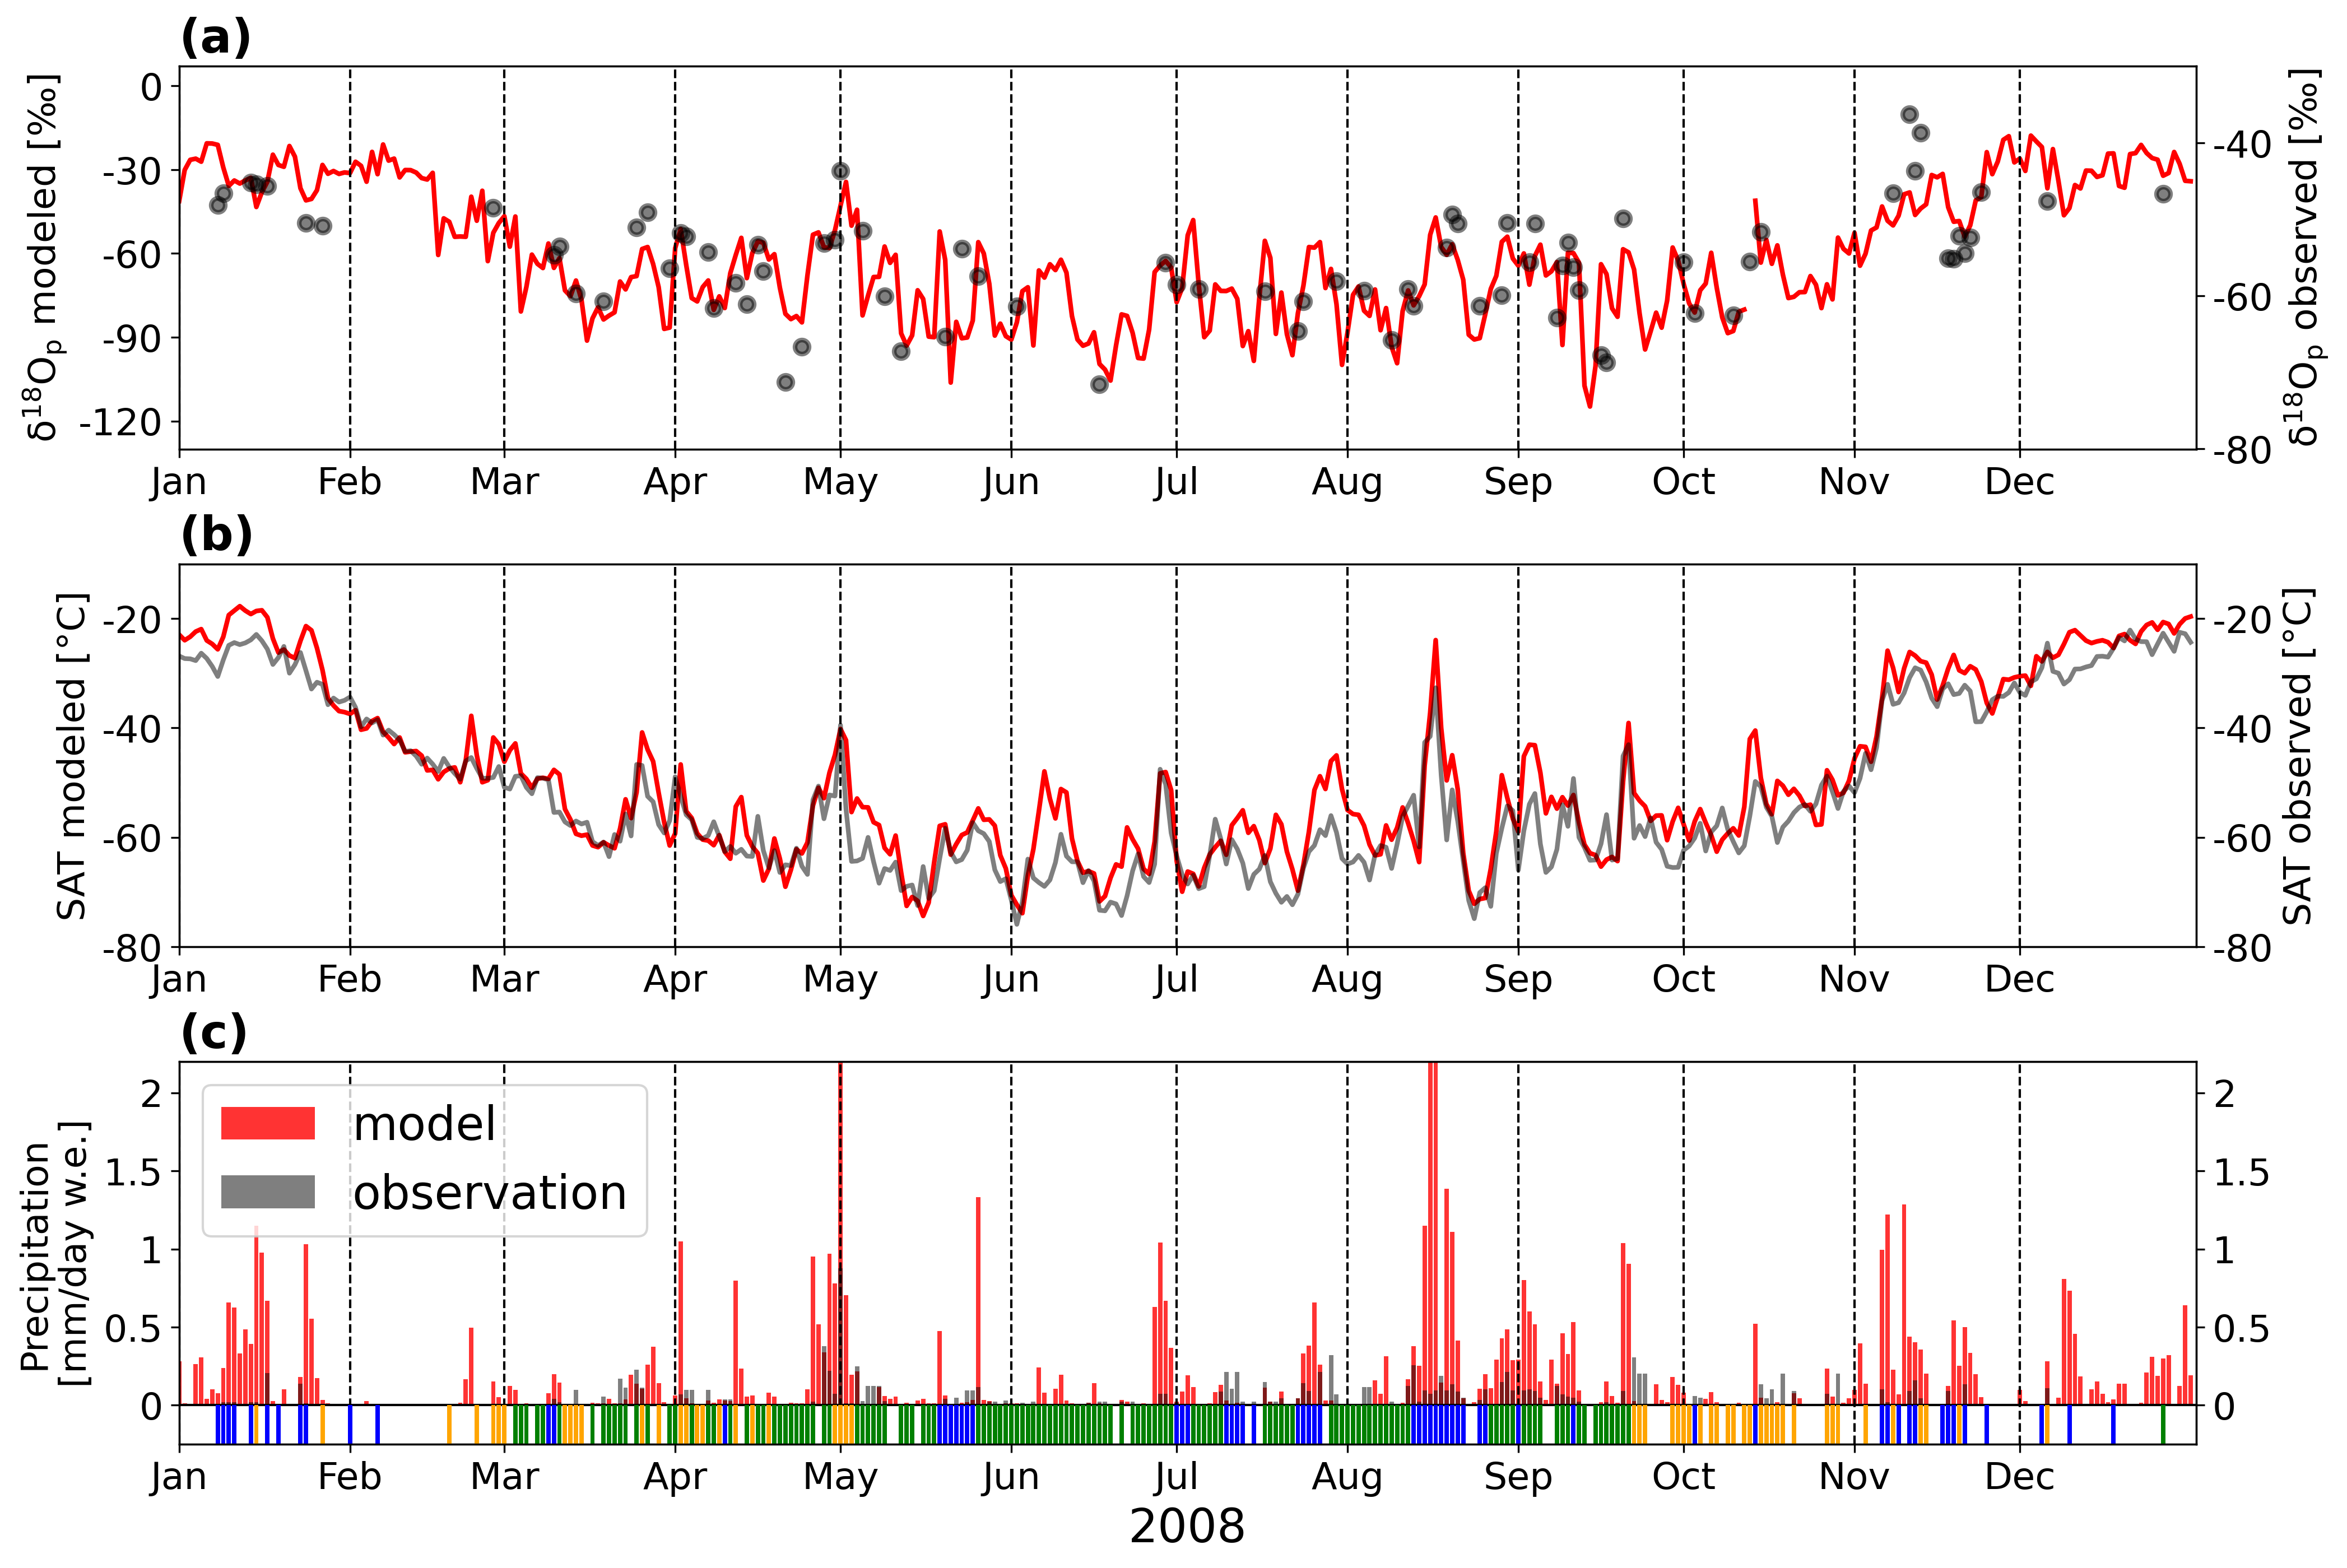

In [18]:
fig = plt.figure(figsize=(15,10)) 
days=366
daylist=range(days)
col_obs = "black"
col_model = "red"

#-- d18Op --
ax = fig.add_subplot(3,1,1)
plt.title("(a)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_prcp_d18O_dc2008, ms=10, color=col_model, linewidth=2, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("$\mathsf{\delta^{18}O_p}$ modeled [\u2030]", fontsize=16, color=col_obs) 
ax.set_xlim(0, days)
ax.set_ylim(-130,7)
ax.set_yticks([-120,-90,-60,-30,0])
ax.set_yticklabels([-120,-90,-60,-30,0],fontsize=16)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)

## Observation
ax2=ax.twinx()
ax2.scatter(daylist, obs_prcp_d18O_dc2008, color=col_obs, linewidth=2, alpha=0.5, label="observation")
ax2.tick_params(labelsize=24)
ax2.set_ylabel("$\mathsf{\delta^{18}O_p}$ observed [\u2030]", fontsize=16, color=col_obs) 
ax2.set_xlim(0,days)
ax2.set_ylim(-80,-30)
ax2.set_yticks([-80,-60,-40])
ax2.set_yticklabels([-80,-60,-40],fontsize=16)

vert_lines(ax,xticks)  


#-- Temprature --
ax = fig.add_subplot(3,1,2)
plt.title("(b)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_temp_dc2008, ms=10, color=col_model, linewidth=2, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("SAT modeled [\u00b0C]", fontsize=16, color=col_obs) 
ax.set_xlim(0,days) 
ax.set_ylim(-80,-10)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([-80,-60,-40,-20])
ax.set_yticklabels([-80,-60,-40,-20],fontsize=16)
## Observation
ax2=ax.twinx()
ax2.plot(daylist, obs_temp_dc2008, ms=10, color=col_obs, linewidth=2, alpha=0.5,label="observation")
ax2.tick_params(labelsize=24)
ax2.set_ylabel("SAT observed [\u00b0C]", fontsize=16, color=col_obs) 
ax2.set_xlim(0, days)
ax2.set_ylim(-80,-10)
ax2.set_yticks([-80,-60,-40,-20])
ax2.set_yticklabels([-80,-60,-40,-20],fontsize=16)
vert_lines(ax,xticks)  

#-- Precipitation --
ax = fig.add_subplot(3,1,3)
plt.title("(c)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.bar(daylist, model_prcp_dc2008, color=col_model, linewidth=2, alpha=0.8, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("Precipitation\n[mm/day w.e.]", fontsize=16, color=col_obs) 
ax.set_xlim(0,days)
ax.set_ylim(-0.25,2.2)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels([0,0.5,1,1.5,2],fontsize=16)

## Observation
ax2=ax.twinx()
ax.bar(daylist, obs_prcp_dc2008, color=col_obs, linewidth=2, alpha=0.5, label="observation")
ax2.tick_params(labelsize=24)
#ax2.set_ylabel("Precipitation [mm/day w.e.]", fontsize=16, color=col_obs) 
ax2.set_xlim(0,days)
ax2.set_ylim(-0.25,2.2)
ax2.set_yticks([0,0.5,1,1.5,2])
ax2.set_yticklabels([0,0.5,1,1.5,2],fontsize=16)


ax2.bar(daylist,obs_snowfall_dc2008, color="orange", linewidth=2,alpha=1, label="snowfall")
ax2.bar(daylist,obs_frost_dc2008, color="green", linewidth=2,alpha=1, label="hoar frost")
ax2.bar(daylist,obs_diamond_dc2008, color="blue",linewidth=2, alpha=1, label="diamond dust")
hor_lines(ax,[0]) 
vert_lines(ax,xticks) 

ax.set_xlabel("2008", loc="center",fontsize=20)
h1, l1 = ax.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc='upper left',fontsize=20)
plt.legend(h1, l1, loc='upper left',fontsize=20)
#h2, l2 = ax2.get_legend_handles_labels()

plt.subplots_adjust(top=0.92,bottom=0.1,left=0.1,right=0.9,hspace=0.3,wspace=0.05)
plt.show()
fig.savefig("Ant_proxy_DC2008.png")
fig.savefig("pic/FigureS2.jpg")

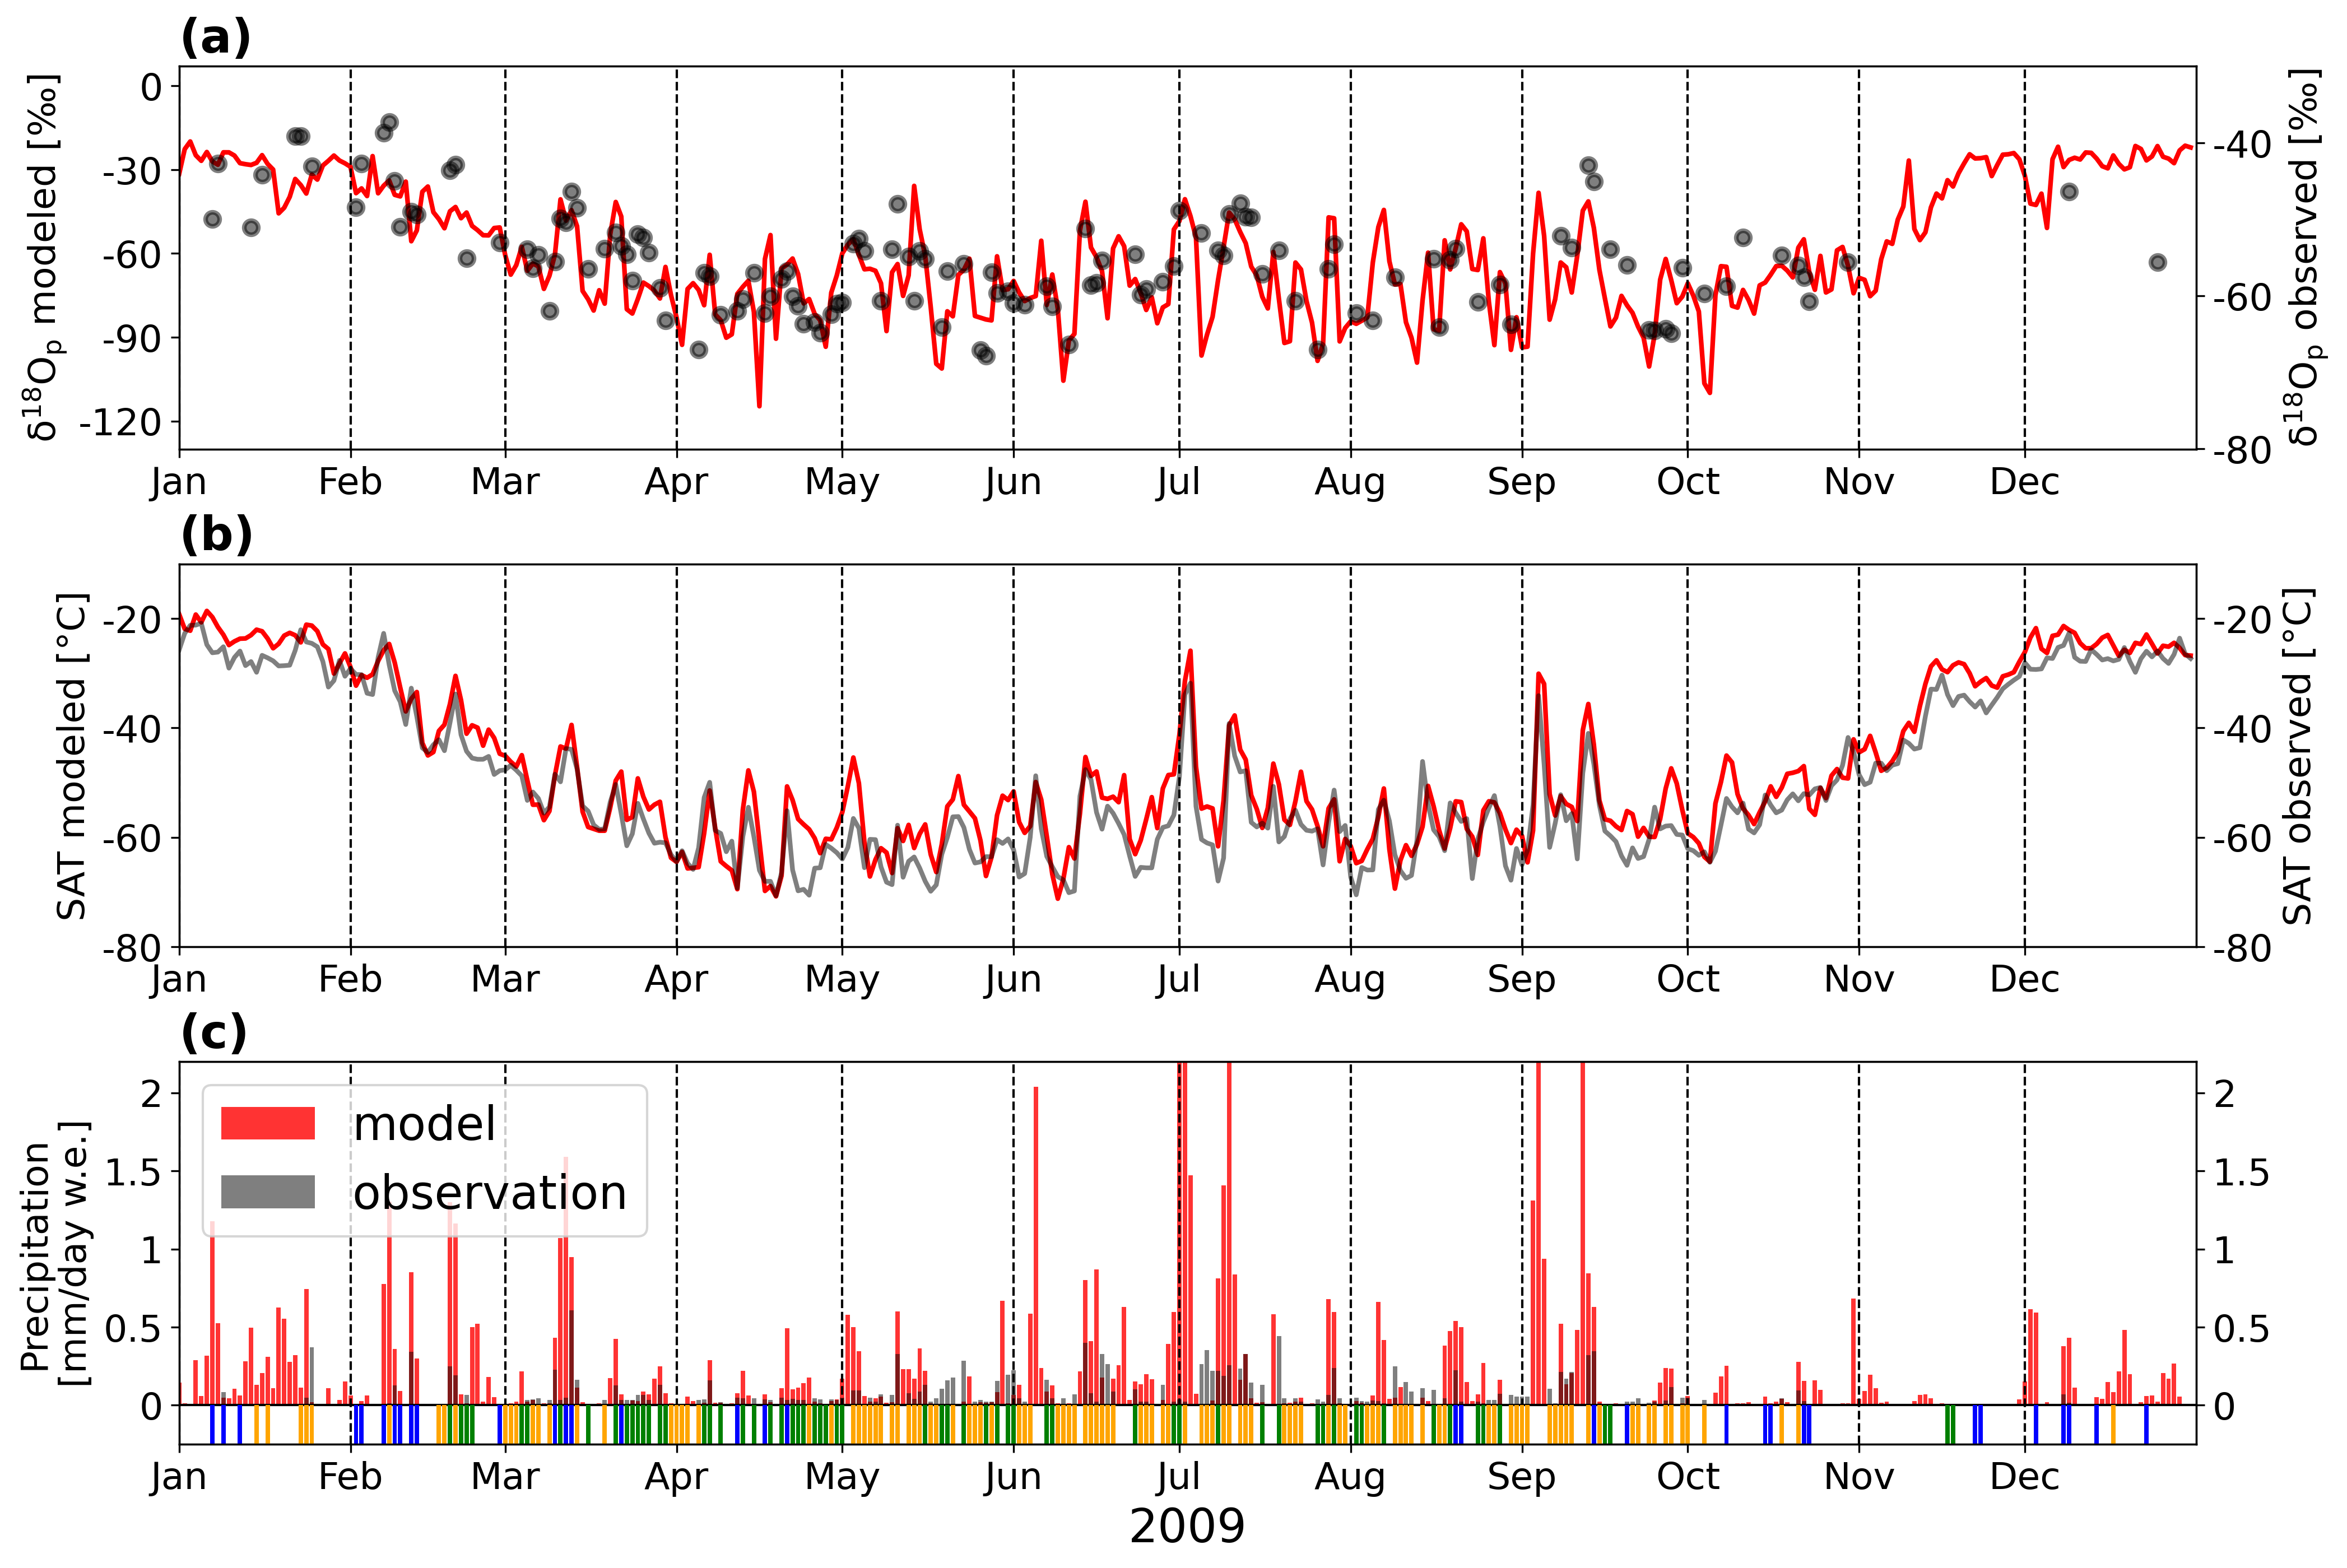

In [31]:
fig = plt.figure(figsize=(15,10)) 
days=365
daylist=range(days)
col_obs = "black"
col_model = "red"

#-- d18Op --
ax = fig.add_subplot(3,1,1)
plt.title("(a)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_prcp_d18O_dc2009, ms=10, color=col_model, linewidth=2, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("$\mathsf{\delta^{18}O_p}$ modeled [\u2030]", fontsize=16, color=col_obs) 
ax.set_xlim(0, days)
ax.set_ylim(-130,7)
ax.set_yticks([-120,-90,-60,-30,0])
ax.set_yticklabels([-120,-90,-60,-30,0],fontsize=16)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)

## Observation
ax2=ax.twinx()
ax2.scatter(daylist, obs_prcp_d18O_dc2009, color=col_obs, linewidth=2, alpha=0.5, label="observation")
ax2.tick_params(labelsize=24)
ax2.set_ylabel("$\mathsf{\delta^{18}O_p}$ observed [\u2030]", fontsize=16, color=col_obs) 
ax2.set_xlim(0,days)
ax2.set_ylim(-80,-30)
ax2.set_yticks([-80,-60,-40])
ax2.set_yticklabels([-80,-60,-40],fontsize=16)

vert_lines(ax,xticks)  


#-- Temprature --
ax = fig.add_subplot(3,1,2)
plt.title("(b)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_temp_dc2009, ms=10, color=col_model, linewidth=2, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("SAT modeled [\u00b0C]", fontsize=16, color=col_obs) 
ax.set_xlim(0,days) 
ax.set_ylim(-80,-10)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([-80,-60,-40,-20])
ax.set_yticklabels([-80,-60,-40,-20],fontsize=16)
## Observation
ax2=ax.twinx()
ax2.plot(daylist, obs_temp_dc2009, ms=10, color=col_obs, linewidth=2, alpha=0.5,label="observation")
ax2.tick_params(labelsize=24)
ax2.set_ylabel("SAT observed [\u00b0C]", fontsize=16, color=col_obs) 
ax2.set_xlim(0, days)
ax2.set_ylim(-80,-10)
ax2.set_yticks([-80,-60,-40,-20])
ax2.set_yticklabels([-80,-60,-40,-20],fontsize=16)
vert_lines(ax,xticks)  

#-- Precipitation --
ax = fig.add_subplot(3,1,3)
plt.title("(c)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.bar(daylist, model_prcp_dc2009, color=col_model, linewidth=2, alpha=0.8, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("Precipitation\n[mm/day w.e.]", fontsize=16, color=col_obs) 
ax.set_xlim(0,days)
ax.set_ylim(-0.25,2.2)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels([0,0.5,1,1.5,2],fontsize=16)

## Observation
ax2=ax.twinx()
ax.bar(daylist, obs_prcp_dc2009, color=col_obs, linewidth=2, alpha=0.5, label="observation")
ax2.tick_params(labelsize=24)
#ax2.set_ylabel("Precipitation [mm/day w.e.]", fontsize=16, color=col_obs) 
ax2.set_xlim(0,days)
ax2.set_ylim(-0.25,2.2)
ax2.set_yticks([0,0.5,1,1.5,2])
ax2.set_yticklabels([0,0.5,1,1.5,2],fontsize=16)


ax2.bar(daylist,obs_snowfall_dc2009, color="orange", linewidth=2,alpha=1, label="snowfall")
ax2.bar(daylist,obs_frost_dc2009, color="green", linewidth=2,alpha=1, label="hoar frost")
ax2.bar(daylist,obs_diamond_dc2009, color="blue",linewidth=2, alpha=1, label="diamond dust")
hor_lines(ax,[0]) 
vert_lines(ax,xticks) 

ax.set_xlabel("2009", loc="center",fontsize=20)
h1, l1 = ax.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc='upper left',fontsize=20)
plt.legend(h1, l1, loc='upper left',fontsize=20)
#h2, l2 = ax2.get_legend_handles_labels()

plt.subplots_adjust(top=0.92,bottom=0.1,left=0.1,right=0.9,hspace=0.3,wspace=0.05)
plt.show()
fig.savefig("Ant_proxy_DC2009.png")
fig.savefig("pic/FigureS3.jpg")

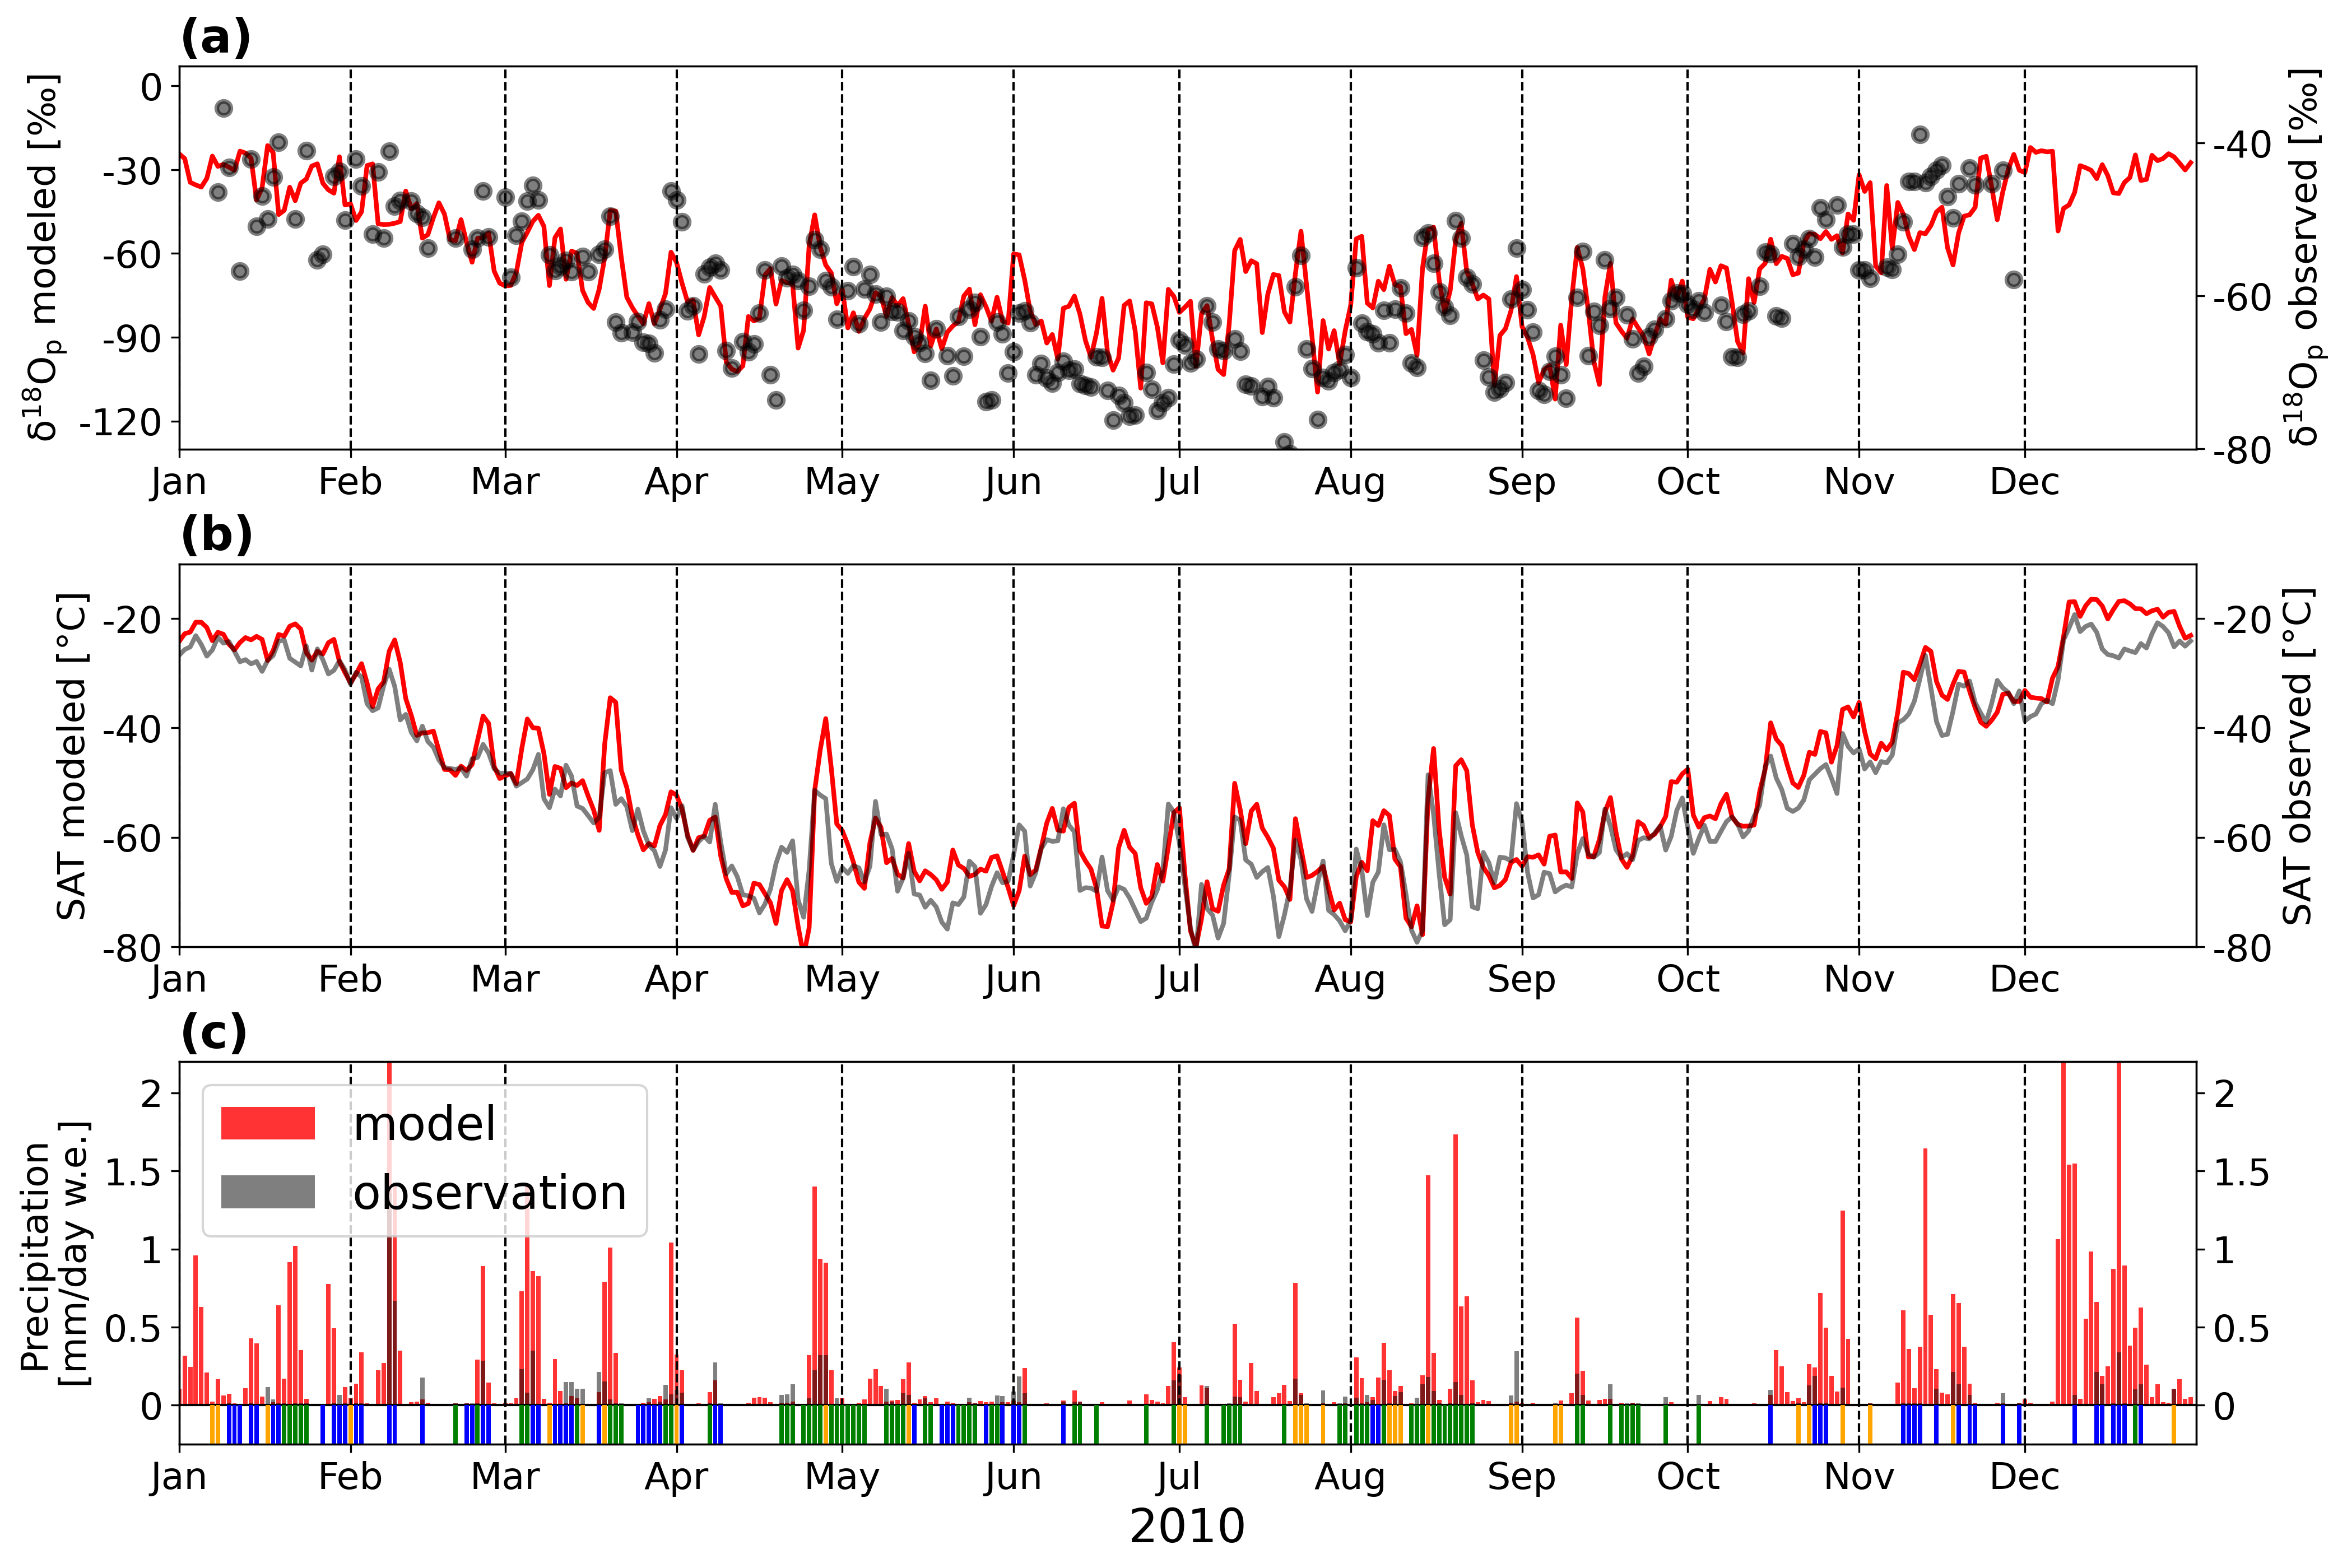

In [32]:
fig = plt.figure(figsize=(15,10)) 
days=365
daylist=range(days)
col_obs = "black"
col_model = "red"

#-- d18Op --
ax = fig.add_subplot(3,1,1)
plt.title("(a)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_prcp_d18O_dc2010, ms=10, color=col_model, linewidth=2, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("$\mathsf{\delta^{18}O_p}$ modeled [\u2030]", fontsize=16, color=col_obs) 
ax.set_xlim(0, days)
ax.set_ylim(-130,7)
ax.set_yticks([-120,-90,-60,-30,0])
ax.set_yticklabels([-120,-90,-60,-30,0],fontsize=16)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)

## Observation
ax2=ax.twinx()
ax2.scatter(daylist, obs_prcp_d18O_dc2010, color=col_obs, linewidth=2, alpha=0.5, label="observation")
ax2.tick_params(labelsize=24)
ax2.set_ylabel("$\mathsf{\delta^{18}O_p}$ observed [\u2030]", fontsize=16, color=col_obs) 
ax2.set_xlim(0,days)
ax2.set_ylim(-80,-30)
ax2.set_yticks([-80,-60,-40])
ax2.set_yticklabels([-80,-60,-40],fontsize=16)

vert_lines(ax,xticks)  


#-- Temprature --
ax = fig.add_subplot(3,1,2)
plt.title("(b)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.plot(daylist, model_temp_dc2010, ms=10, color=col_model, linewidth=2, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("SAT modeled [\u00b0C]", fontsize=16, color=col_obs) 
ax.set_xlim(0,days) 
ax.set_ylim(-80,-10)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([-80,-60,-40,-20])
ax.set_yticklabels([-80,-60,-40,-20],fontsize=16)
## Observation
ax2=ax.twinx()
ax2.plot(daylist, obs_temp_dc2010, ms=10, color=col_obs, linewidth=2, alpha=0.5,label="observation")
ax2.tick_params(labelsize=24)
ax2.set_ylabel("SAT observed [\u00b0C]", fontsize=16, color=col_obs) 
ax2.set_xlim(0, days)
ax2.set_ylim(-80,-10)
ax2.set_yticks([-80,-60,-40,-20])
ax2.set_yticklabels([-80,-60,-40,-20],fontsize=16)
vert_lines(ax,xticks)  

#-- Precipitation --
ax = fig.add_subplot(3,1,3)
plt.title("(c)",loc="left",fontsize=20, weight="demibold") 
## Model
ax.bar(daylist, model_prcp_dc2010, color=col_model, linewidth=2, alpha=0.8, label="model")
ax.tick_params(labelsize=24)
ax.set_ylabel("Precipitation\n[mm/day w.e.]", fontsize=16, color=col_obs) 
ax.set_xlim(0,days)
ax.set_ylim(-0.25,2.2)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels([0,0.5,1,1.5,2],fontsize=16)

## Observation
ax2=ax.twinx()
ax.bar(daylist, obs_prcp_dc2010, color=col_obs, linewidth=2, alpha=0.5, label="observation")
ax2.tick_params(labelsize=24)
#ax2.set_ylabel("Precipitation [mm/day w.e.]", fontsize=16, color=col_obs) 
ax2.set_xlim(0,days)
ax2.set_ylim(-0.25,2.2)
ax2.set_yticks([0,0.5,1,1.5,2])
ax2.set_yticklabels([0,0.5,1,1.5,2],fontsize=16)


ax2.bar(daylist,obs_snowfall_dc2010, color="orange", linewidth=2,alpha=1, label="snowfall")
ax2.bar(daylist,obs_frost_dc2010, color="green", linewidth=2,alpha=1, label="hoar frost")
ax2.bar(daylist,obs_diamond_dc2010, color="blue",linewidth=2, alpha=1, label="diamond dust")
hor_lines(ax,[0]) 
vert_lines(ax,xticks) 

ax.set_xlabel("2010", loc="center",fontsize=20)
h1, l1 = ax.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc='upper left',fontsize=20)
plt.legend(h1, l1, loc='upper left',fontsize=20)
#h2, l2 = ax2.get_legend_handles_labels()

plt.subplots_adjust(top=0.92,bottom=0.1,left=0.1,right=0.9,hspace=0.3,wspace=0.05)
plt.show()
fig.savefig("Ant_proxy_DC2010.png")
fig.savefig("pic/FigureS4.jpg")

In [21]:
import statsmodels.tools.eval_measures as smte

In [22]:
def corr(a1,a2):
    aa1=a1[~(np.isnan(a1)+np.isnan(a2))]
    aa2=a2[~(np.isnan(a1)+np.isnan(a2))]
    return stats.spearmanr(aa1,aa2)[0]

In [23]:
obs_prcp_d18O_dc=np.concatenate([obs_prcp_d18O_dc2008,obs_prcp_d18O_dc2009,obs_prcp_d18O_dc2010])
model_prcp_d18O_dc= np.concatenate([model_prcp_d18O_dc2008,model_prcp_d18O_dc2009,model_prcp_d18O_dc2010])
obs_prcp_dc=np.concatenate([obs_prcp_dc2008,obs_prcp_dc2009,obs_prcp_dc2010])
model_prcp_dc= np.concatenate([model_prcp_dc2008,model_prcp_dc2009,model_prcp_dc2010])
obs_temp_dc=np.concatenate([obs_temp_dc2008,obs_temp_dc2009,obs_temp_dc2010])
model_temp_dc= np.concatenate([model_temp_dc2008,model_temp_dc2009,model_temp_dc2010])

In [24]:
corr_d18O = "{:4.2f}".format(corr(obs_prcp_d18O_dc,model_prcp_d18O_dc))
corr_temp = "{:4.2f}".format(corr(obs_temp_dc,model_temp_dc))
corr_prcp = "{:4.2f}".format(corr(obs_prcp_dc,model_prcp_dc))  

In [25]:
corr_d18O, corr_temp, corr_prcp

('0.77', '0.93', '0.30')

In [26]:
def sqrt(a1,a2):
    aa1=a1[~(np.isnan(a1)+np.isnan(a2))]
    aa2=a2[~(np.isnan(a1)+np.isnan(a2))]
    return smte.rmse(aa1,aa2)

In [27]:
df=pd.DataFrame.from_dict({
    "$\mathsf{\delta^{18}O_p}$":[sqrt(obs_prcp_d18O_dc,model_prcp_d18O_dc),
                                 np.nanmean(obs_prcp_d18O_dc),np.nanmean(model_prcp_d18O_dc),
                                 np.nanmedian(obs_prcp_d18O_dc),np.nanmedian(model_prcp_d18O_dc),
                                 np.nanstd(obs_prcp_d18O_dc),np.nanstd(model_prcp_d18O_dc)],
    "$\mathsf{SAT}$"           :[sqrt(obs_temp_dc,model_temp_dc),
                                 np.nanmean(obs_temp_dc),np.nanmean(model_temp_dc),
                                 np.nanmedian(obs_temp_dc),np.nanmedian(model_temp_dc),
                                 np.nanstd(obs_temp_dc),np.nanstd(model_temp_dc)],
    "$\mathsf{prcp}$"          :[sqrt(obs_prcp_dc,model_prcp_dc),
                                 np.nanmean(obs_prcp_dc),np.mean(model_prcp_dc),
                                 np.nanmedian(obs_prcp_dc),np.median(model_prcp_dc),
                                 np.nanstd(obs_prcp_dc),np.nanstd(model_prcp_df)],
},orient="index")
df.columns=["Sqrt", "mean(obs)","mean(model)","median(obs)","median(model)","SD (obs)","SD(model)"]
df

,Sqrt,mean(obs),mean(model),median(obs),median(model),SD (obs),SD(model)
$\mathsf{\delta^{18}O_p}$,16.382214,-58.088028,-61.404885,-58.002904,-64.131020,8.496691,22.188251
$\mathsf{SAT}$,5.238338,-51.487308,-48.512644,-55.550000,-52.419455,15.178583,15.524328
$\mathsf{prcp}$,0.414868,0.039761,0.196701,0.004700,0.029823,0.088150,0.432651


In [28]:
np.nanmax(obs_prcp_d18O_dc)-np.nanmin(obs_prcp_d18O_dc)

45.1330854

In [29]:
np.nanmax(model_prcp_d18O_dc)-np.nanmin(model_prcp_d18O_dc)

96.9501724243164

In [30]:
 np.nansum(obs_prcp_dc),np.nansum(model_prcp_dc),

(41.471085777, 215.58451857795774)

Kanon Kino (kanon[at]aori.u-tokyo.ac.jp)